In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Data_Dictionary.csv to Data_Dictionary.csv
Saving sample_submission.csv to sample_submission.csv
Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73113 entries, 0 to 73112
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          73113 non-null  int64  
 1   Client_Income               70928 non-null  object 
 2   Car_Owned                   70939 non-null  float64
 3   Bike_Owned                  70940 non-null  float64
 4   Active_Loan                 70936 non-null  float64
 5   House_Own                   70943 non-null  float64
 6   Child_Count                 70889 non-null  float64
 7   Credit_Amount               70923 non-null  object 
 8   Loan_Annuity                70256 non-null  object 
 9   Accompany_Client            72065 non-null  object 
 10  Client_Income_Type          70893 non-null  object 
 11  Client_Education            70918 non-null  object 
 12  Client_Marital_Status       71058 non-null  object 
 13  Client_Gender               716

In [4]:
null = train.isnull().sum().sort_values(ascending=False)
total = train.shape[0]
percent_missing = (null / total).sort_values(ascending=False)

# Get data types
dtypes = train.dtypes[null.index]  # Align dtype with sorted nulls

# Combine into one DataFrame
missing_data = pd.concat([null, percent_missing, dtypes], axis=1,
                         keys=['Total missing', 'Percent missing', 'Dtype'])

# Reset index and rename
missing_data.reset_index(inplace=True)
missing_data = missing_data.rename(columns={"index": "Hamara Backchodi"})

print("Null Values in each column:\n",
      missing_data.sort_values(by='Total missing', ascending=False))

Null Values in each column:
               Hamara Backchodi  Total missing  Percent missing    Dtype
0                Own_House_Age          48020         0.656792  float64
1               Score_Source_1          41390         0.566110  float64
2        Social_Circle_Default          37227         0.509171  float64
3            Client_Occupation          24824         0.339529   object
4               Score_Source_3          16156         0.220973  float64
5                Credit_Bureau          11152         0.152531  float64
6                      ID_Days           3631         0.049663   object
7               Score_Source_2           3385         0.046298  float64
8   Population_Region_Relative           2885         0.039459   object
9                 Loan_Annuity           2857         0.039076   object
10               Employed_Days           2266         0.030993   object
11                Phone_Change           2254         0.030829  float64
12                 Child_Count     

In [5]:
test.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
0,12202565,13500,0.0,0.0,1.0,NaN,2.0,32702.4,2013.75,Relative,...,14.0,Yes,No,Self-employed,0.878573,0.745873,0.786266615,0.0938,567.0,1.0
1,12147892,7200,0.0,0.0,0.0,1.0,1.0,18000,900,Alone,...,12.0,Yes,Yes,XNA,NaN,0.381946,NaN,NaN,0.0,NaN
2,12204105,13500,1.0,0.0,1.0,1.0,0.0,28440,1338.75,Alone,...,8.0,Yes,Yes,XNA,0.478754,0.395162,0.317031779,0.0876,305.0,0.0
3,12104165,8100,0.0,0.0,1.0,1.0,1.0,22500,1477.8,Alone,...,14.0,Yes,No,Self-employed,NaN,NaN,0.479448981,NaN,1910.0,1.0
4,12117404,13500,0.0,0.0,1.0,1.0,0.0,157500,4331.25,Relative,...,14.0,Yes,Yes,Trade: type 7,0.211158,0.505704,NaN,0.0258,0.0,3.0


In [6]:
null = test.isnull().sum().sort_values(ascending=False)
total = test.shape[0]
percent_missing = (null / total).sort_values(ascending=False)

# Get data types
dtypes = train.dtypes[null.index]  # Align dtype with sorted nulls

# Combine into one DataFrame
missing_data = pd.concat([null, percent_missing, dtypes], axis=1,
                         keys=['Total missing', 'Percent missing', 'Dtype'])

# Reset index and rename
missing_data.reset_index(inplace=True)
missing_data = missing_data.rename(columns={"index": "Hamara Backchodi"})

print("Null Values in each column:\n",
      missing_data.sort_values(by='Total missing', ascending=False))

Null Values in each column:
               Hamara Backchodi  Total missing  Percent missing    Dtype
0                Own_House_Age          16061         0.659021  float64
1               Score_Source_1          13606         0.558286  float64
2        Social_Circle_Default          12369         0.507529  float64
3            Client_Occupation           8224         0.337450   object
4               Score_Source_3           5394         0.221329  float64
5                Credit_Bureau           3696         0.151656  float64
6                      ID_Days           1165         0.047803   object
7               Score_Source_2           1094         0.044889  float64
8                 Loan_Annuity            965         0.039596   object
9   Population_Region_Relative            957         0.039268   object
10           Registration_Days            747         0.030651   object
11                    Age_Days            745         0.030569   object
12            Client_Education     

Looking at the missing percentage of certain columns like Own HOuse Age..etc, We can Remove such column from both test and train as they add huge noise to the dataset

In [7]:
# List of columns to drop due to high missing %
high_missing_cols = ['Own_House_Age', 'Score_Source_1', 'Social_Circle_Default','Client_Occupation']

# Drop from both train and test
train.drop(columns=high_missing_cols, inplace=True, errors='ignore')
test.drop(columns=high_missing_cols, inplace=True, errors='ignore')

Some of the data is inconsistent because numeric values with strings are represented as objects so we will go through unique values of each column from both train and test data and fix these errors

In [8]:
numeric_object_columns = [
    'Client_Income', 'Credit_Amount', 'Loan_Annuity',
    'Population_Region_Relative', 'Age_Days', 'Employed_Days',
    'Registration_Days', 'ID_Days', 'Score_Source_3'
]


def convert_object_to_numeric(df, cols):
    df = df.copy()
    for col in cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(r'[^0-9.\-]', '', regex=True)
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df
train = convert_object_to_numeric(train, numeric_object_columns)
test = convert_object_to_numeric(test, numeric_object_columns)

In [9]:
# List of columns to convert
numeric_cols = [
    "Client_Income",
    "Credit_Amount",
    "Loan_Annuity",
    "Age_Days",
    "Employed_Days",
    "Registration_Days",
    "ID_Days"
]

# Convert to numeric, forcing errors to NaN (so weird entries become NaN)
for col in numeric_cols:
    train[col] = pd.to_numeric(train[col], errors="coerce")
    test[col] = pd.to_numeric(test[col], errors="coerce")


In [10]:
train['Client_Gender'] = train['Client_Gender'].replace('XNA', 'Unknown')
train['Type_Organization'] = train['Type_Organization'].replace('XNA', 'Unknown')


In [11]:
train['Accompany_Client'].value_counts(dropna=False)
train['Accompany_Client'] = train['Accompany_Client'].replace('##', 'Unknown')


In [12]:
train['Population_Region_Relative'] = pd.to_numeric(train['Population_Region_Relative'], errors='coerce')
train['Population_Region_Relative'].describe()


,Population_Region_Relative
count,70220.000000
mean,0.022325
std,0.377550
min,0.000533
25%,0.010006
50%,0.018850
75%,0.028663
max,100.000000


In [13]:
test['Population_Region_Relative'] = pd.to_numeric(test['Population_Region_Relative'], errors='coerce')
test['Accompany_Client'] = test['Accompany_Client'].replace('##', 'Unknown')
test['Client_Gender'] = test['Client_Gender'].replace('XNA', 'Unknown')
test['Type_Organization'] = test['Type_Organization'].replace('XNA', 'Unknown')


In [14]:
#remove the ID column as we dont need it in the train dataset
train.drop(columns = ['ID', 'ID_Days','Score_Source_3'], inplace=True)
test.drop(columns = ['ID', 'ID_Days','Score_Source_3'], inplace=True)

In [15]:
# Fill categorical columns with mode
categorical_cols = [
    "Credit_Bureau", "Client_Income_Type", "Bike_Owned", "Type_Organization",
    "Active_Loan", "Accompany_Client", "Client_Marital_Status",
    "Client_Housing_Type", "Application_Process_Hour", "Car_Owned",
    "Client_Education", "House_Own", "Loan_Contract_Type",
    "Cleint_City_Rating", "Client_Gender", "Application_Process_Day" ,"Client_Permanent_Match_Tag",	"Client_Contact_Work_Tag"
]

for col in categorical_cols:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(test[col].mode()[0])


# Fill numeric columns with median
numeric_cols = [
     "Score_Source_2", "Population_Region_Relative", "Loan_Annuity",
    "Age_Days", "Client_Income", "Phone_Change", "Employed_Days",
    "Registration_Days", "Child_Count", "Credit_Amount", "Client_Family_Members"
]

for col in numeric_cols:
    train[col] = train[col].fillna(train[col].median())
    test[col] = test[col].fillna(test[col].median())


In [16]:
train.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Credit_Bureau,Default
0,14400.0,0.0,0.0,0.0,1.0,0.0,69004.80,2238.75,Alone,Retired,...,2.0,4.0,8.0,Yes,Yes,Unknown,0.130674,874.0,1.0,0
1,12150.0,0.0,0.0,0.0,1.0,0.0,22500.00,2363.85,Alone,Retired,...,2.0,0.0,8.0,Yes,Yes,Business Entity Type 3,0.530742,757.0,0.0,0
2,16650.0,0.0,0.0,0.0,1.0,1.0,75519.00,3339.45,Alone,Retired,...,2.0,1.0,13.0,Yes,Yes,Unknown,0.533110,588.0,0.0,1
3,10800.0,0.0,1.0,1.0,1.0,0.0,15750.00,837.45,Alone,Service,...,2.0,5.0,10.0,Yes,Yes,Business Entity Type 3,0.599514,557.0,1.0,0
4,15750.0,1.0,0.0,1.0,1.0,0.0,64117.35,2132.10,Alone,Commercial,...,2.0,4.0,16.0,Yes,No,Business Entity Type 3,0.608870,1435.0,2.0,0


In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store the label encoders
label_encoders = {}

# Iterate through each categorical column
for col in categorical_cols:
    le = LabelEncoder()

    # Fit on combined data to ensure consistency
    combined_data = pd.concat([train[col], test[col]], axis=0).astype(str)
    le.fit(combined_data)

    # Transform train and test
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

    # Store the encoder if needed later
    label_encoders[col] = le


In [18]:
pd.set_option('display.max_columns', None)
train.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Credit_Bureau,Default
0,14400.0,0,0,0,1,0.0,69004.80,2238.75,0,4,4,1,1,0,1,0.018029,20116.0,365243.0,3807.0,1,0,0,2.0,1,4,22,1,1,57,0.130674,874.0,1,0
1,12150.0,0,0,0,1,0.0,22500.00,2363.85,0,4,4,3,1,0,1,0.030755,15763.0,365243.0,12605.0,1,0,0,1.0,1,0,22,1,1,5,0.530742,757.0,0,0
2,16650.0,0,0,0,1,1.0,75519.00,3339.45,0,4,4,1,0,0,1,0.004849,15536.0,365243.0,3742.0,1,0,0,3.0,1,1,5,1,1,57,0.533110,588.0,0,1
3,10800.0,0,1,1,1,0.0,15750.00,837.45,0,5,4,2,1,0,1,0.009334,13246.0,697.0,7112.0,1,0,1,1.0,1,5,2,1,1,5,0.599514,557.0,1,0
4,15750.0,1,0,1,1,0.0,64117.35,2132.10,0,1,4,3,1,0,1,0.035792,16687.0,1690.0,3019.0,1,0,0,1.0,1,4,8,1,0,5,0.608870,1435.0,10,0


In [19]:
from sklearn.preprocessing import StandardScaler

# Define numeric columns to scale
numeric_cols = [
    "Client_Income",
    "Credit_Amount",
    "Loan_Annuity",
    "Population_Region_Relative",
    "Age_Days",
    "Employed_Days",
    "Registration_Days",
    "Score_Source_2",
    "Phone_Change",
    "Child_Count",
    "Client_Family_Members",
    "Cleint_City_Rating",
    "Application_Process_Day",
    "Application_Process_Hour"
]

# Initialize scaler
scaler = StandardScaler()

# Fit scaler only on train data
scaler.fit(train[numeric_cols])

# Transform train and test
train[numeric_cols] = scaler.transform(train[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

In [20]:
train.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Credit_Bureau,Default
0,-0.198055,0,0,0,1,-0.564937,0.231698,-0.331925,0,4,4,1,1,0,1,-0.011239,0.946883,2.186104,-0.336237,1,0,0,-0.166846,-0.055492,0.493276,1.902791,1,1,57,-0.514762,-0.100837,1,0
1,-0.385558,0,0,0,1,-0.564937,-0.940352,-0.244200,0,4,4,3,1,0,1,0.023155,-0.064760,2.186104,2.198066,1,0,0,-1.271292,-0.055492,-1.794342,1.902791,1,1,5,0.012124,-0.244477,0,0
2,-0.010552,0,0,0,1,0.828829,0.395874,0.439929,0,4,4,1,0,0,1,-0.046860,-0.117515,2.186104,-0.354961,1,0,0,0.937600,-0.055492,-1.222438,-0.497054,1,1,57,0.015243,-0.451957,0,1
3,-0.498060,0,1,1,1,-0.564937,-1.110470,-1.314571,0,5,4,2,1,0,1,-0.034739,-0.649713,-0.469589,0.615783,1,0,1,-1.271292,-0.055492,1.065180,-0.920557,1,1,5,0.102697,-0.490015,1,0
4,-0.085553,1,0,1,1,-0.564937,0.108521,-0.406712,0,1,4,3,1,0,1,0.036769,0.149979,-0.462355,-0.563224,1,0,0,-1.271292,-0.055492,0.493276,-0.073552,1,0,5,0.115018,0.587897,10,0


In [21]:
!pip install imblearn

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X = train.drop(columns=["Default"])
y = train["Default"]
# Print original class distribution
print("Before resampling:")
print(y.value_counts(), "\n")

# Apply SMOTE: make minority class 50% the size of the majority
smote = SMOTE(sampling_strategy=0.8, random_state=73)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print new class distribution
print("After resampling:")
print(pd.Series(y_resampled).value_counts())

Before resampling:
Default
0    67231
1     5882
Name: count, dtype: int64 

After resampling:
Default
0    67231
1    53784
Name: count, dtype: int64


In [23]:
!pip install xgboost

In [24]:
from xgboost import XGBClassifier

# Train on all resampled data
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb.fit(X_resampled, y_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, ...)

In [25]:
importances = xgb.feature_importances_
feature_names = X.columns

feat_imp_df = (
    pd.DataFrame({"feature": feature_names, "importance": importances})
    .sort_values(by="importance", ascending=False)
)

# Display Top 20
top_20 = feat_imp_df.head(20)
print(top_20)


                       feature  importance
24     Application_Process_Day    0.129630
1                    Car_Owned    0.126757
13          Loan_Contract_Type    0.078278
12               Client_Gender    0.075504
21           Workphone_Working    0.069090
25    Application_Process_Hour    0.051532
2                   Bike_Owned    0.048905
3                  Active_Loan    0.045307
22       Client_Family_Members    0.038791
29              Score_Source_2    0.036422
27     Client_Contact_Work_Tag    0.033603
5                  Child_Count    0.029360
15  Population_Region_Relative    0.026863
23          Cleint_City_Rating    0.025166
20               Homephone_Tag    0.024814
26  Client_Permanent_Match_Tag    0.022433
0                Client_Income    0.019568
4                    House_Own    0.019381
10            Client_Education    0.011946
30                Phone_Change    0.011069


In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest requires numeric data (which you already have)
selector = SelectKBest(score_func=f_classif, k=20)
selector.fit(X_resampled, y_resampled)

# Get scores
scores = selector.scores_
feature_names = X.columns

feat_scores_df = (
    pd.DataFrame({"feature": feature_names, "score": scores})
    .sort_values(by="score", ascending=False)
)

# Display top 20
top_20_selectkbest = feat_scores_df.head(20)
print(top_20_selectkbest)


                       feature        score
12               Client_Gender  6709.011220
21           Workphone_Working  6294.075822
1                    Car_Owned  5913.663911
2                   Bike_Owned  4454.431753
3                  Active_Loan  4361.645420
27     Client_Contact_Work_Tag  3435.633397
13          Loan_Contract_Type  2990.888894
26  Client_Permanent_Match_Tag  2790.255968
16                    Age_Days  2390.822072
20               Homephone_Tag  2015.284175
4                    House_Own  1945.395184
30                Phone_Change  1777.658374
10            Client_Education  1442.409361
11       Client_Marital_Status  1229.261335
23          Cleint_City_Rating  1174.024106
17               Employed_Days   908.369317
14         Client_Housing_Type   769.888136
6                Credit_Amount   768.705954
18           Registration_Days   748.353106
29              Score_Source_2   409.595696


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_resampled, y_resampled)

# Get importances
rf_importances = rf.feature_importances_
feature_names = X.columns

feat_rf_df = (
    pd.DataFrame({"feature": feature_names, "importance": rf_importances})
    .sort_values(by="importance", ascending=False)
)

# Display top 20
top_20_rf = feat_rf_df.head(20)
print(top_20_rf)


                       feature  importance
29              Score_Source_2    0.179230
12               Client_Gender    0.122682
1                    Car_Owned    0.119091
21           Workphone_Working    0.089433
2                   Bike_Owned    0.057810
3                  Active_Loan    0.054680
25    Application_Process_Hour    0.051219
24     Application_Process_Day    0.042813
15  Population_Region_Relative    0.033632
13          Loan_Contract_Type    0.030652
17               Employed_Days    0.029353
30                Phone_Change    0.028759
23          Cleint_City_Rating    0.023295
27     Client_Contact_Work_Tag    0.019812
22       Client_Family_Members    0.015904
0                Client_Income    0.015542
6                Credit_Amount    0.013890
16                    Age_Days    0.011736
26  Client_Permanent_Match_Tag    0.010389
20               Homephone_Tag    0.009151


In [28]:
selected_features = [
    'Client_Gender',
    'Car_Owned',
    'Bike_Owned',
    'Active_Loan',
    'Workphone_Working',
    'Loan_Contract_Type',
    'Score_Source_2',
    'Application_Process_Hour',
    'Application_Process_Day',
    'Phone_Change',
    'Cleint_City_Rating',
    'Client_Permanent_Match_Tag',
    'Population_Region_Relative'
]


In [29]:
train = train[selected_features + ['Default']]

In [30]:
test = test[selected_features]

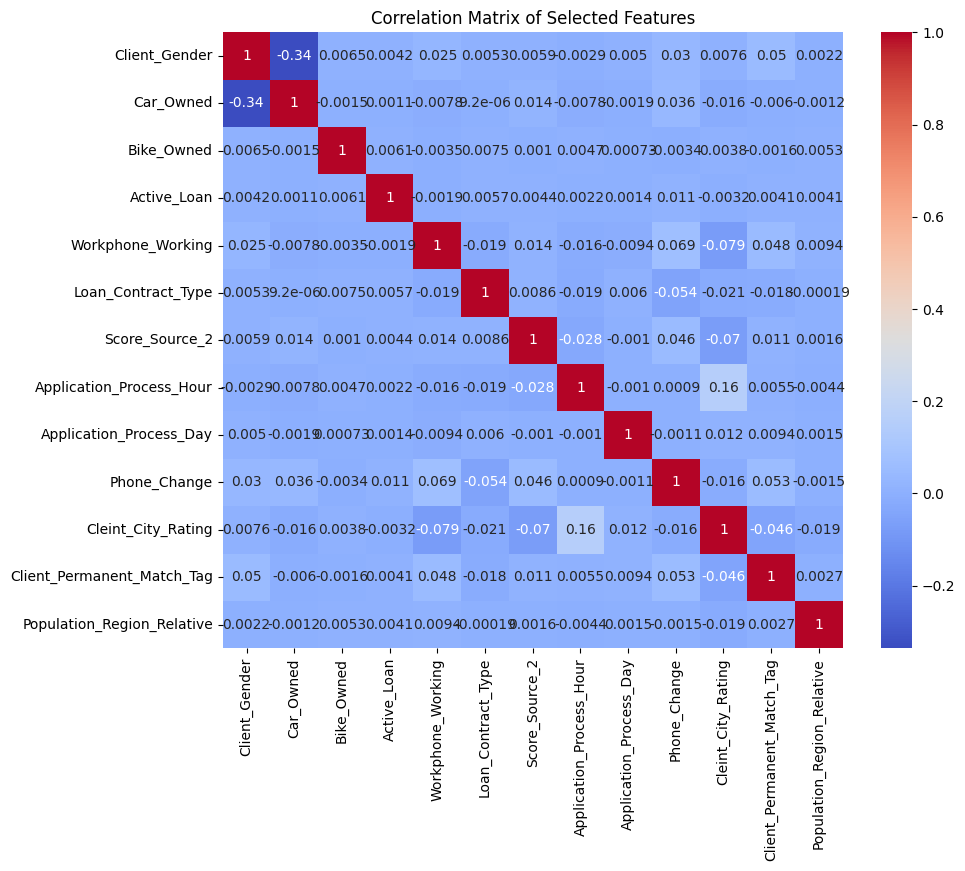

In [31]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(train[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Selected Features")
plt.show()


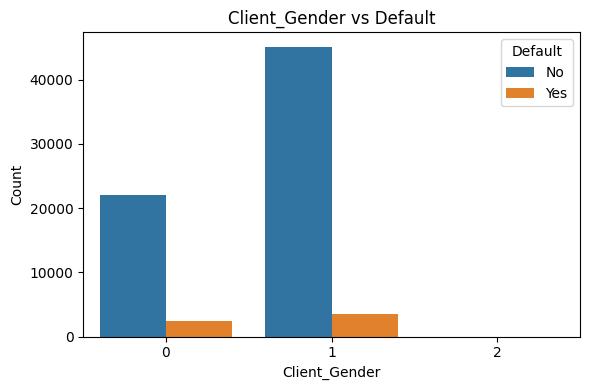

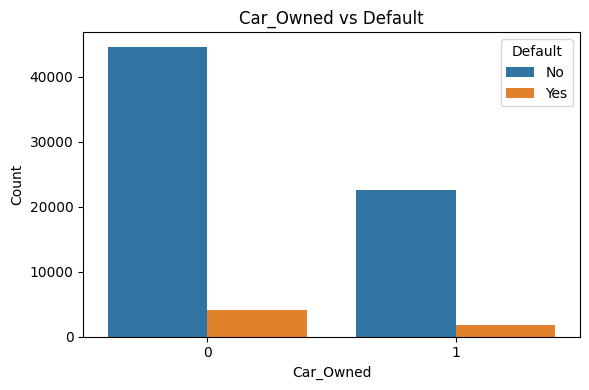

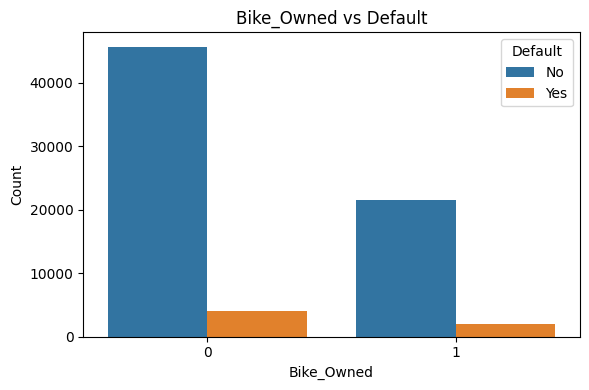

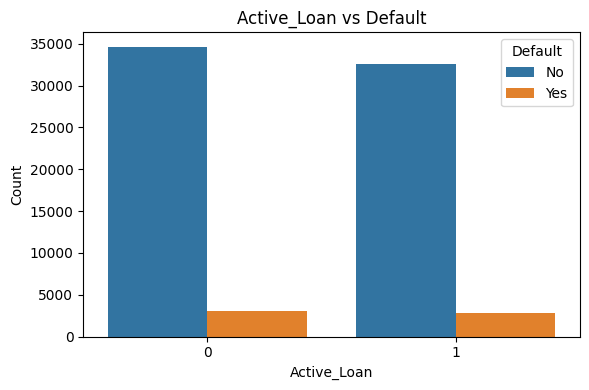

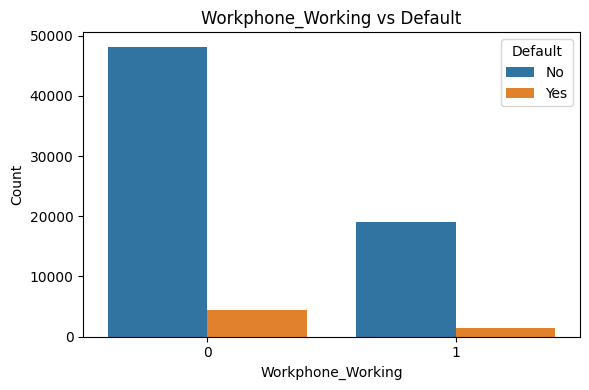

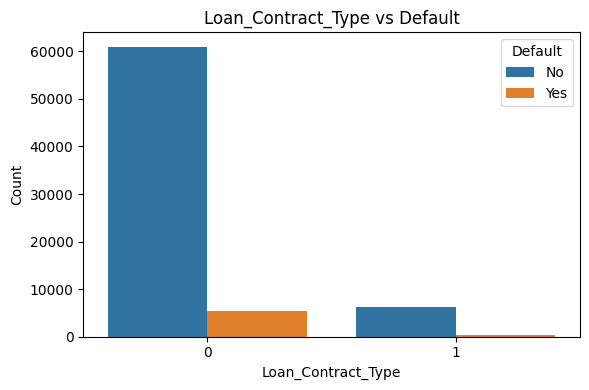

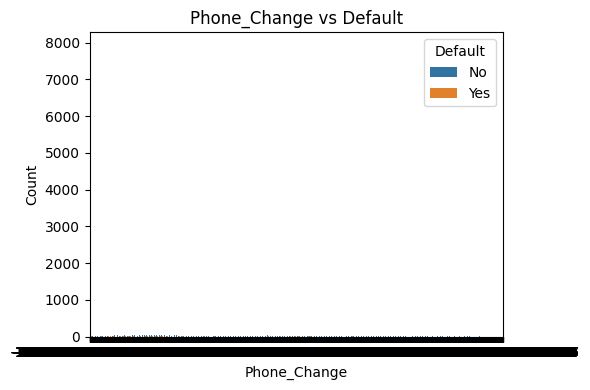

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical = ['Client_Gender', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
               'Workphone_Working', 'Loan_Contract_Type', 'Phone_Change']

for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train, x=col, hue='Default')
    plt.title(f'{col} vs Default')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Default', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()


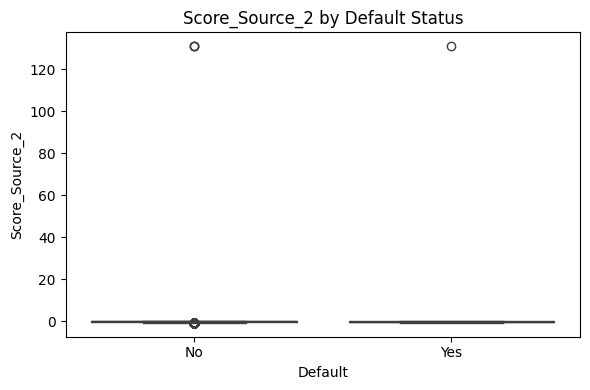

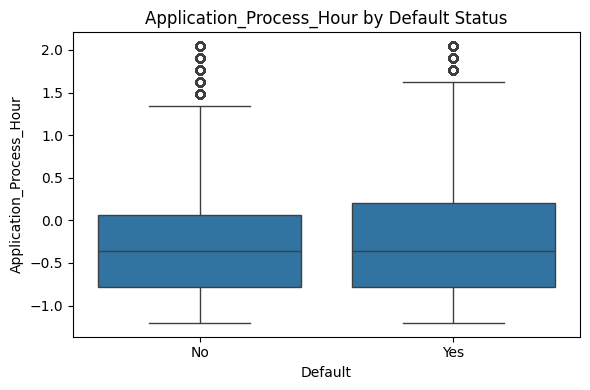

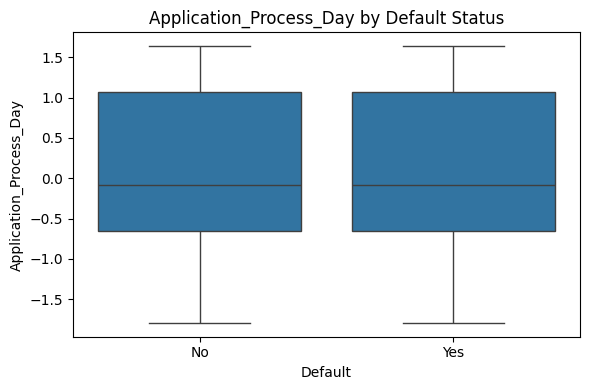

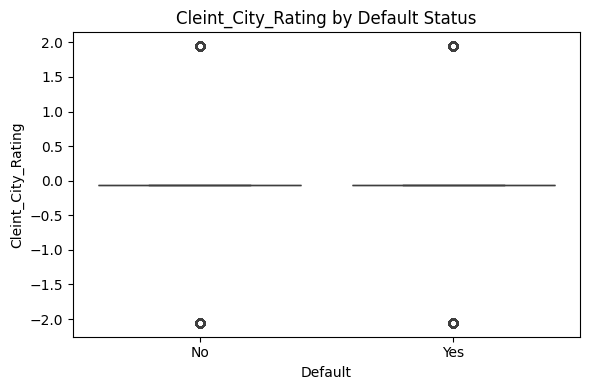

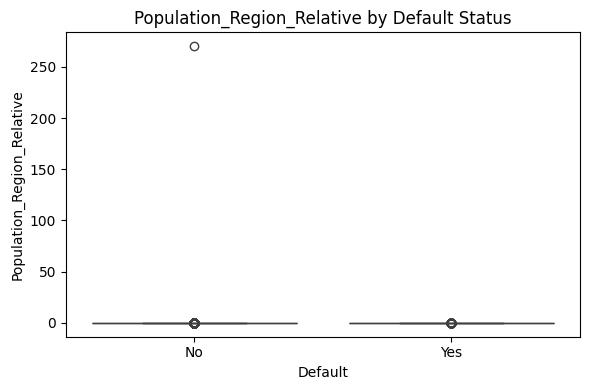

In [33]:
numerical = ['Score_Source_2', 'Application_Process_Hour', 'Application_Process_Day',
             'Cleint_City_Rating', 'Population_Region_Relative']

for col in numerical:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train, x='Default', y=col)
    plt.title(f'{col} by Default Status')
    plt.xlabel('Default')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.tight_layout()
    plt.show()


In [34]:
X = train.drop("Default", axis=1)
y = train["Default"]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [36]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply to training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new shapes
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)

X_train_resampled shape: (107568, 13)
y_train_resampled shape: (107568,)


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [38]:
# Convert train data
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32).unsqueeze(1)

# Convert test data
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [39]:
batch_size = 64

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [40]:
class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

model = ANNModel(input_dim=X_train_tensor.shape[1])


In [41]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05 ,weight_decay=1e-4)


In [42]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 25.7 MB/s eta 0:00:00


In [43]:
def objective(trial):
    # 🎯 Refined search space
    lr = trial.suggest_float("lr", 0.0015, 0.004, log=True)
    dropout = trial.suggest_float("dropout", 0.25, 0.4)
    hidden1 = trial.suggest_int("hidden1", 48, 96, step=16)
    hidden2 = trial.suggest_int("hidden2", 32, 64, step=8)
    weight_decay = trial.suggest_float("weight_decay", 0.005, 0.01, log=True)

    class ANNModel(nn.Module):
        def __init__(self, input_dim):
            super().__init__()
            self.fc1 = nn.Linear(input_dim, hidden1)
            self.fc2 = nn.Linear(hidden1, hidden2)
            self.out = nn.Linear(hidden2, 1)
            self.dropout = nn.Dropout(dropout)

        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = self.dropout(x)
            x = F.relu(self.fc2(x))
            x = self.dropout(x)
            x = torch.sigmoid(self.out(x))
            return x

    model = ANNModel(X_train_tensor.shape[1])
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.BCELoss()

    for epoch in range(20):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_test_tensor)
        y_val_pred_cls = (y_val_pred > 0.5).int()
        f1 = f1_score(y_test_tensor.numpy(), y_val_pred_cls.numpy())

    return f1


In [45]:
!pip install optuna

Epoch 1/200 | Loss: 0.7019 | Train Acc: 0.5000 | Val Acc: 0.0804
Epoch 2/200 | Loss: 0.7456 | Train Acc: 0.5042 | Val Acc: 0.9196
Epoch 3/200 | Loss: 0.6935 | Train Acc: 0.5140 | Val Acc: 0.9196
Epoch 4/200 | Loss: 0.6972 | Train Acc: 0.5005 | Val Acc: 0.9196
Epoch 5/200 | Loss: 0.6974 | Train Acc: 0.5000 | Val Acc: 0.9196
Epoch 6/200 | Loss: 0.6968 | Train Acc: 0.5000 | Val Acc: 0.9196
Epoch 7/200 | Loss: 0.6954 | Train Acc: 0.5000 | Val Acc: 0.9196
Epoch 8/200 | Loss: 0.6934 | Train Acc: 0.5000 | Val Acc: 0.9196
Epoch 9/200 | Loss: 0.6921 | Train Acc: 0.5000 | Val Acc: 0.9196
Epoch 10/200 | Loss: 0.6910 | Train Acc: 0.5000 | Val Acc: 0.9196
Epoch 11/200 | Loss: 0.6886 | Train Acc: 0.4995 | Val Acc: 0.9196
Epoch 12/200 | Loss: 0.6875 | Train Acc: 0.5098 | Val Acc: 0.4876
Epoch 13/200 | Loss: 0.6864 | Train Acc: 0.5487 | Val Acc: 0.4188
Epoch 14/200 | Loss: 0.6842 | Train Acc: 0.5589 | Val Acc: 0.3992
Epoch 15/200 | Loss: 0.6822 | Train Acc: 0.5666 | Val Acc: 0.4591
Epoch 16/200 | Loss

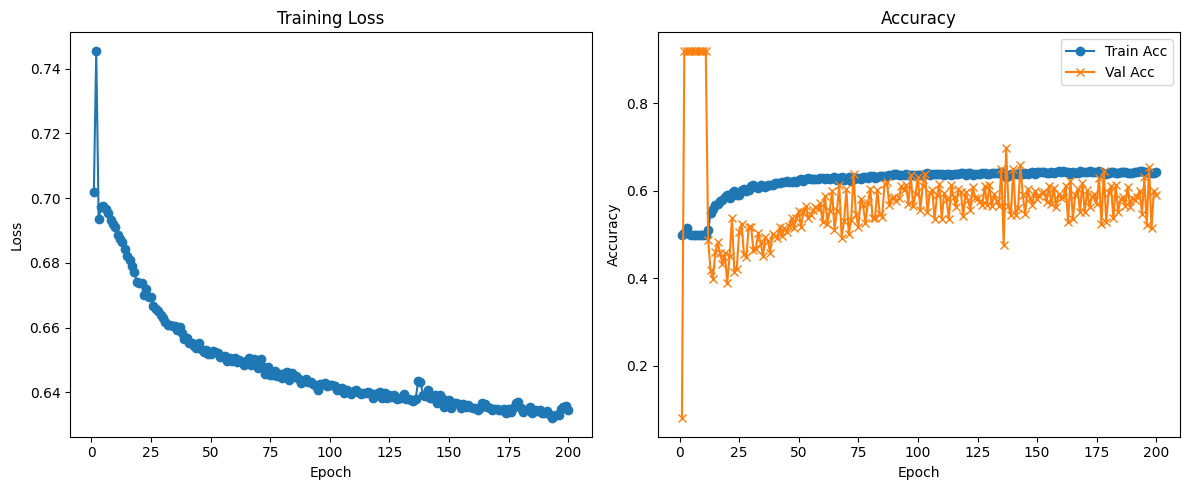


Classification Report:

              precision    recall  f1-score   support

         0.0     0.9467    0.5887    0.7259     13447
         1.0     0.1166    0.6207    0.1963      1176

    accuracy                         0.5913     14623
   macro avg     0.5316    0.6047    0.4611     14623
weighted avg     0.8799    0.5913    0.6833     14623



In [48]:
# Store metrics
train_losses = []
train_accuracies = []
val_accuracies = []

epochs = 200
for epoch in range(epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Compute train accuracy
    train_preds = (outputs >= 0.5).float()
    train_acc = (train_preds == y_train_tensor).sum().item() / len(y_train_tensor)

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_preds = (val_outputs >= 0.5).float()
        val_acc = (val_preds == y_test_tensor).sum().item() / len(y_test_tensor)

    # Store metrics
    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(
        f"Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f} | "
        f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}"
    )

# ===========================
# 📊 Plot Loss and Accuracy
# ===========================
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Accuracy
plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Acc', marker='o')
plt.plot(range(1, epochs+1), val_accuracies, label='Val Acc', marker='x')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# ===========================
# 📝 Classification Report
# ===========================
from sklearn.metrics import classification_report

# Convert to numpy
y_true = y_test_tensor.numpy()
y_pred = val_preds.numpy()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, digits=4))

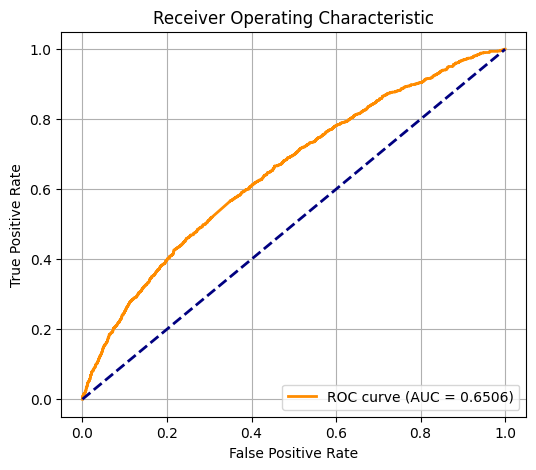

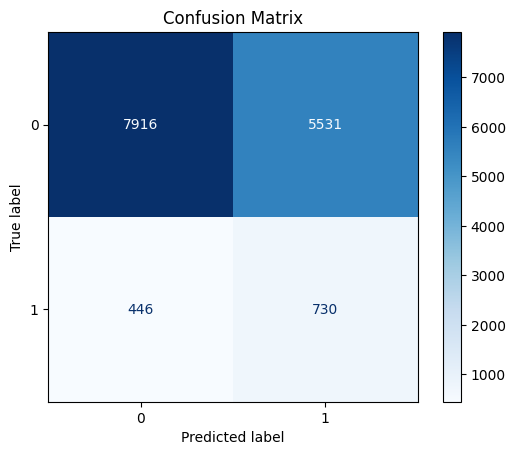

In [49]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Get raw probabilities instead of thresholded outputs
y_scores = val_outputs.numpy()  # These are still logits or probs

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Sorry For the Late Submission i had completed this assignment earlier but forgot about it totally
